In [1]:
import os, glob
import rasterio
import numpy as np
import geopandas as gpd
import rasterio.features
from tqdm.notebook import tqdm
import rasterio.mask
import fiona

In [6]:
shp_path = r"/home/skm/SKM16/Work/OpenLand/3_dichHistogram/Training_Building/shp_cut_img_and_mask/20220815_103905_ssc7_u0001_visual.shp"
fp_img = r"/home/skm/SKM16/Work/OpenLand/3_dichHistogram/Training_Building/Img_original/20220815_103905_ssc7_u0001_visual.tif"
fp_mask = r"/home/skm/SKM16/Work/OpenLand/3_dichHistogram/Training_Building/Mask_buildUp/20220815_103905_ssc7_u0001_visual.tif"
out_dir_mask = r""
df = gpd.read_file(shp_path)['geometry']

with rasterio.open(img1) as src:
    crs = src.crs
df = df.to_crs(crs)
# with fiona.open(shp_path, "r") as shapefile:
#     shapes = [feature["geometry"] for feature in shapefile]

In [28]:
src = rasterio.open(img1)
out_meta = src.meta
z = 0
for i in range(len(df)):
    a = f"a{z}"
    out_image, out_transform = rasterio.mask.mask(src, df.iloc[i:i+1], crop=True)
    out_meta.update({"driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform})

    with rasterio.open(f"/home/skm/SKM16/Work/OpenLand/3_dichHistogram/Training_Building/xoa/{a}.tif", 'w',**out_meta) as dst:
        dst.write(out_image)
    print("x")
    z += 1
    

<class 'int'>
done
x
<class 'int'>
done
x
<class 'int'>
done
x
<class 'int'>
done
x
<class 'int'>
done
x
<class 'int'>
done
x


In [26]:
df.iloc[0:1]

0    POLYGON ((746483.933 3266256.037, 746483.933 3...
Name: geometry, dtype: geometry

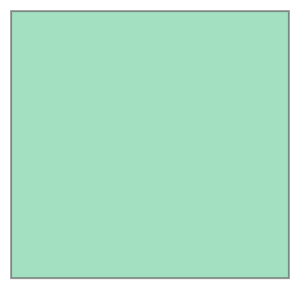

In [21]:
df.iloc[0]

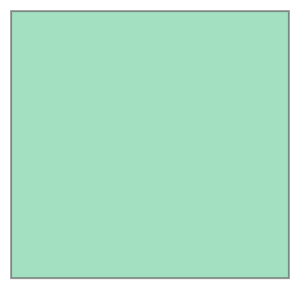

In [24]:
df[0]